<a href="https://colab.research.google.com/github/BrittonWinterrose/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/module1-OLS-regression/Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model .



In [0]:
#!pip install seaborn --upgrade
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Import the dataset
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head() 

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
# Get rid of irrelevant columns
df2 = df.drop(columns=['id','date'])
df2['PPSF'] = df2.price / (df2.sqft_living)

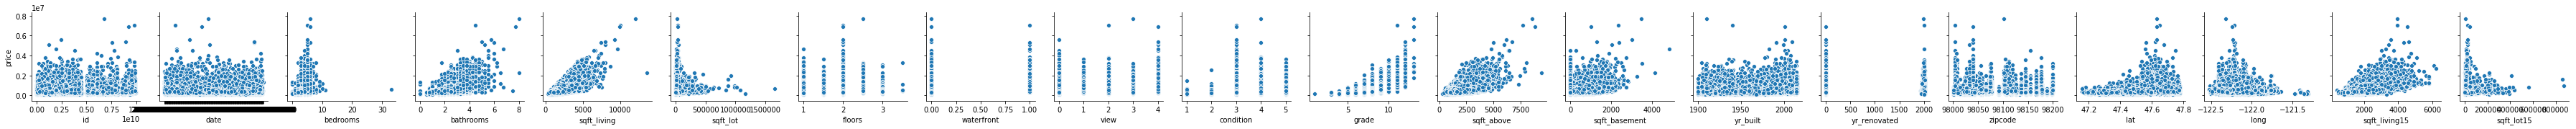

In [4]:
# Explore it real quick after dropping date & id. 
x_columns = df.columns.drop('price')
g = sns.pairplot(data = df, y_vars=["price"], x_vars=x_columns)

In [5]:
# Select the x-value and y-values.
# The pairplot looks to show the most positive corrilation between sqft and price, but # of As and price also looks interesting. 
y = df[['price']]
x = np.asarray(df[["sqft_living"]])

#Inspect the shape.
print (y.shape)
print (x.shape)

(21613, 1)
(21613, 1)


In [0]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.5, random_state=42)

In [0]:
# Make a function for linear regression. 
def my_regression(X_train, X_test, y_train, y_test, title):
    # Define model
    model = LinearRegression()
    
    # Fit each column of data to the model. 
    model.fit(X_train, y_train)
    coefficient = model.coef_
    intercept = model.intercept_
    
    # Print the title
    print(f"{title}")
    
    # Print the first metrics
    print(f"  Coefficient: {model.coef_}")
    print(f"  Intercept: {model.intercept_}")

    # Check results and generate predictions from test data. 
    y_test_predict = model.predict(X_test)

    # Check the Mean Squared Error for each
    MSE = mean_squared_error(y_test, y_test_predict)

    # Check the Root Mean Sqare Error for each 
    RMSE = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

    # Check Rsquared for each
    R2 = r2_score(y_test, y_test_predict)

    # Print the stats
    
    print(f"  MSE is {MSE}")
    print(f"  RMSE is {RMSE}")
    print(f"  R^2 is {R2}")
    return model, coefficient, intercept, y_test_predict, MSE, RMSE, R2

In [8]:
# Call my function with the appropriate data. 
model, coefficient, intercept, y_test_predict, MSE, RMSE, R2 = my_regression(X_train, X_test, y_train, y_test, "Square Footage ")

Square Footage 
  Coefficient: [[268.42931803]]
  Intercept: [-20631.15655449]
  MSE is 75628624138.70985
  RMSE is 275006.58926416625
  R^2 is 0.49226256935760826


(10807, 1)
(10807, 1)


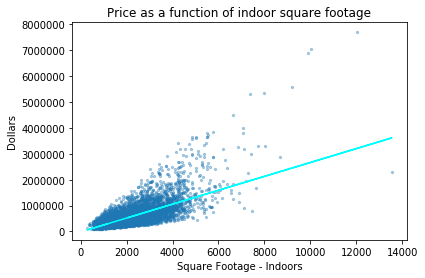

In [9]:
# Plot that graph
print(X_test.shape)
print(y_test.shape)
fig, ax = plt.subplots()
ax.scatter(X_test, y_test.T, label='Data', alpha=0.35, s=5);
ax.plot(X_test, model.predict(X_test),color = "cyan");
ax.set_xlabel('Square Footage - Indoors')
ax.set_ylabel('Dollars')
ax.set_title('Price as a function of indoor square footage');

# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [10]:
# Select the x-value and y-values.
# Here I'll look at both the sqft & grade
y = df[['price']]
x = np.asarray(df[["sqft_living", "grade"]])

#Inspect the shape.
print (x.shape)
print (y.shape)

(21613, 2)
(21613, 1)


In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
# Fit model, make predictions and calculate all the stats. 
model, coefficient, intercept, y_test_predict, MSE, RMSE, R2 = my_regression(X_train, X_test, y_train, y_test, "Two-Variable Multiple Regression ")

(10806, 2)
(10807, 2)
(10806, 1)
(10807, 1)
Two-Variable Multiple Regression 
  Coefficient: [[   167.10832275 103065.16259903]]
  Intercept: [-599835.66185812]
  MSE is 70544952427.10252
  RMSE is 265602.9977750675
  R^2 is 0.5263921128006677


(10806, 2)
(10807, 2)
(10806, 1)
(10807, 1)
(10807, 1)


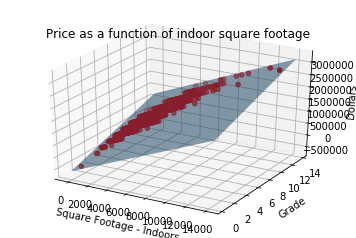

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_test_predict.shape)

# Plot a 3 axis graph. 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot Points on 3D plot
ax.scatter(X_test[:,0], X_test[:,1], y_test_predict, c='red')

beta_0 = model.intercept_
beta_i = model.coef_[0]

# Set axes to size of scatter data
x1 = np.array(ax.get_xlim())
y1 = np.array(ax.get_ylim())
xx, yy = np.meshgrid(x1,y1)
zz = beta_i[0]*xx + beta_i[1]*yy + beta_0[0]

beta_0 = model.intercept_
beta_i = model.coef_[0]

# Plot Plane
plt3d = plt.gca(projection='3d')

# Add Opacity to Plane 
plt3d.plot_surface(xx, yy, zz,alpha=0.5)
plt.title("Regression Plane")

# Add titles to the figure
ax.set_xlabel('Square Footage - Indoors')
ax.set_ylabel('Grade')
ax.set_zlabel("Dollars")
ax.set_title('Price as a function of indoor square footage');

plt.show()

# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [13]:
# Select the x-value and y-values.
# Here I'll look at both the sqft & grade
y = df[['price']]
x = df.drop(columns=['id','date','price'])

#Inspect the shape.
print (x.shape)
print (y.shape)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.5, random_state=42)

# Fit model, make predictions and calculate all the stats. 
model, coefficient, intercept, y_test_predict, MSE, RMSE, R2 = my_regression(X_train, X_test, y_train, y_test, "Multi-Variable Multiple Regression ")

(21613, 18)
(21613, 1)
Multi-Variable Multiple Regression 
  Coefficient: [[-3.41930712e+04  3.97125261e+04  9.91229817e+01  1.04057427e-01
   1.00431682e+04  5.73273418e+05  5.36941305e+04  2.47210264e+04
   9.94432289e+04  6.02382105e+01  3.88847715e+01 -2.48044346e+03
   2.12570728e+01 -5.43588580e+02  5.91178244e+05 -1.85711473e+05
   2.64961862e+01 -3.65903971e-01]]
  Intercept: [6705339.54545228]
  MSE is 46526645704.63182
  RMSE is 215700.36092837632
  R^2 is 0.6876404957050217


# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- Write a blog post explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
